In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import Eq, symbols, init_printing, simplify
import time
init_printing()

In [4]:
#x_, f = Matrix(input().split(' ')), Matrix(input().split(' '))

# Пример
x_ = np.array([0.1, 0.55, 1.3, 1.98, 2.64])
f_ = np.array([-2.14, -0.34, -1.7, 0.2, 1.68])

x = symbols('x')

Интерполянт методом Ньютона:


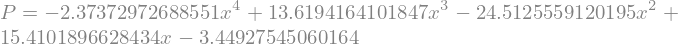

Интерполянт методом Лагранжа:


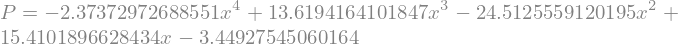

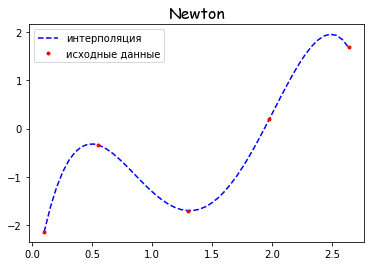

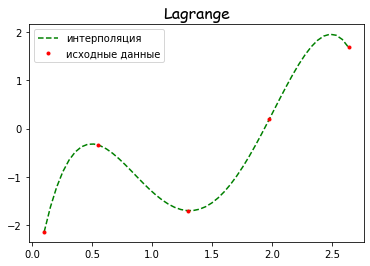

In [27]:
def f(arr, f_, d):
    if len(arr) == 1:
        return d[arr[0]]
    return (f(arr[1 :], f_, d) - f(arr[: len(arr) - 1], f_, d)) / (arr[len(arr) - 1] - arr[0])

class interpolant:
    def __init__(self, x_, f_):
        self.x, self.f, self.P_Lagrange, self.P_Newton, self.razn = x_, f_, 0, 0, []
        
    def interpolation(self):
        P = 0
        for k in range(len(x_)):
            l = 1
            for i in range(len(x_)):
                if i != k:
                    l *= (x - x_[i]) / (x_[k] - x_[i])
            P += l * f_[k]
        self.P_Newton = P
        
        d, P, m = dict(zip(x_, f_)), 0, 1
        for i in range(len(x_)):
            
            P += m * f(x_[0:i + 1], f_, d)
            self.razn.append(f(x_[0:i + 1], f_, d))
            m *= x - x_[i]
        self.P_Lagrange = P
        
    def printing(self, s):
        if s == 'Newton':
            print('Интерполянт методом Ньютона:')
            display(Eq(symbols('P'), simplify(self.P_Newton)))
        elif s == 'Lagrange':
            print('Интерполянт методом Лагранжа:')
            display(Eq(symbols('P'), simplify(self.P_Lagrange)))
        
    def image(self, s):
        p = []
        x__ = np.linspace(min(x_), max(x_), num = len(x_) * 10)
        if s == 'Newton':
            for i in range(len(x__)):
                p.append(self.P_Newton.subs({x: x__[i]}))
            color_ = 'blue'
        elif s == 'Lagrange':
            for i in range(len(x__)):
                p.append(self.P_Lagrange.subs({x: x__[i]}))
            color_ = 'green'
            
        fig, ax = plt.subplots()
        ax.plot(x__, p, '--', label = 'интерполяция', color = color_)
        ax.plot(self.x, self.f, '.', label = 'исходные данные', color = 'red')
        ax.set_title(s, fontfamily = 'fantasy', size = 16)
        ax.legend()
        plt.show()
        
    def find_solution(self, p):
        print(round(self.P_Newton.subs({x: p}), 2))

P = interpolant(x_, f_)
P.interpolation()
P.printing('Newton')
P.printing('Lagrange')
P.image('Newton')
P.image('Lagrange')

In [28]:
print('Таблица разделенных разностей:')
print(np.array(P.razn).round(3))

Таблица разделенных разностей:
[-2.14   4.    -4.844  4.291 -2.374]


Методом неопределённых коэффициентов:  
$ f'(x_0) = Af(x_0 - h) + Bf(x_0) + Cf(x_0 + h) $  
$ f(x_0 + h) = f(x_0) + f'(x_0) \cdot h + f''(x_0) \frac{h^2}2 + O(h^3) $  
$ f(x_0 - h) = f(x_0) - f'(x_0) \cdot h + f''(x_0) \frac{h^2}2 + O(h^3) $  
$ f'(x_0) = A\left[{f(x_0) + f'(x_0) \cdot h + f''(x_0) \frac{h^2}2}\right] + Bf(x_0) + C\left[{f(x_0) - f'(x_0) \cdot h + f''(x_0) \frac{h^2}2}\right] + O(h^3)$  
$ f'(x_0) = (A + B + C)f(x_0) + (Ah - Ch)f'(x_0) + (A\frac{h^2}2 + C\frac{h^2}2)f''(x_0) $  
$\:\\ A + B + C = 0\\
A - C = \frac1h\\
A + C = 0 $  
$\:\\ A = \frac{1}{2h},\:B = 0,\:C = -\frac{1}{2h}\\
f'(x_0) = \frac{1}{2h} (f(x_0 - h) - f(x_0 + h)) $  
Возьмём $h = 1$, тогда $x_0 - h = 0.1,\:x_0 + h = 2.1$  
$f(0.1) = -2.14$ было задано.  
$f(2.1) = 0.78$ находим из вычисленного интерполянта заданной функции.  
В итоге:
$ f'(1.1) = \frac12 \cdot (-2.14 - 0.78) = 1.46 $

In [29]:
P.find_solution(2.1)

0.78
